# Homework 1. Exploratory Data Analysis (Prob 1)

This HW Based on Harvard CS109. All work must be your original code.
---


## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data

The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."
 
#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [requests](http://docs.python-requests.org/en/latest/), grabbing from web
* [IO](https://docs.python.org/3/library/io.html), for StringIO stream
* [zipfile](https://docs.python.org/3/library/zipfile.html), for decompressing zip files.

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

The Oakland Athletics provides a wonderful success story for data science as profiled in Michael Lewis's 2003 book [Moneyball](https://en.wikipedia.org/wiki/Moneyball) and discussed recently on Nate Silver's [fivethirtyeight](http://fivethirtyeight.com/features/billion-dollar-billy-beane). In 2002 and 2003 Oakland A's had a competitive advantage using data science. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.  Download this ipython notebook and submit a new version with your original solutions filled in.

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [IO](https://docs.python.org/3/library/io.html) and [zipfile](https://docs.python.org/3/library/zipfile.html) modules to get from the web.  

In [38]:
#your code here
import requests
import zipfile
import StringIO

zipData = requests.get('http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip')
files = zipfile.ZipFile(StringIO.StringIO(zipData.content))

In [41]:
salaries = pd.read_csv(files.open('Salaries.csv'))
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [42]:
teams = pd.read_csv(files.open('Teams.csv'))
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [61]:
#your code here
yearly_salaries = salaries.groupby(['teamID', 'yearID'], as_index=False).sum()
yearly_salaries.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [70]:
#your code here
teams.rename(columns = {'W':'win'}, inplace = True)
yearly_wins = teams[['teamID', 'yearID', 'win']]
merged_df = pd.merge(yearly_salaries, yearly_wins, on=['teamID', 'yearID'], how='inner')
merged_df.head()

,teamID,yearID,salary,win
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

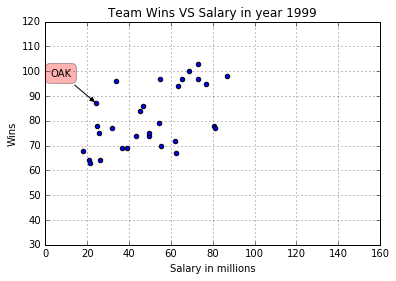

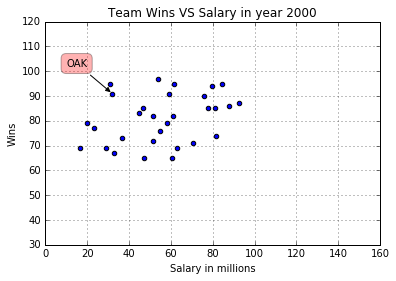

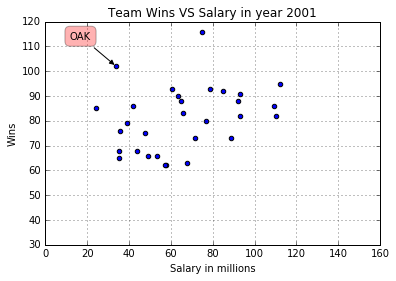

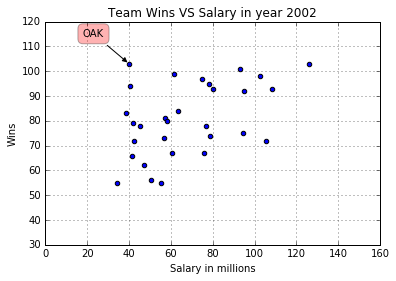

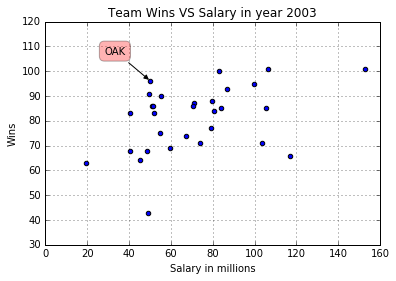

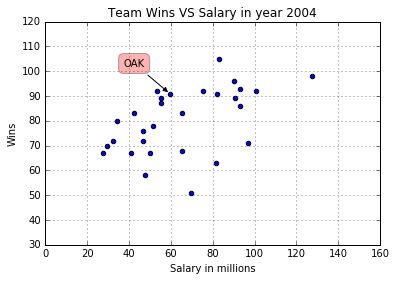

In [123]:
#your code here
years = np.arange(1999, 2005)

for yr in years: 
    df = merged_df[merged_df['yearID'] == yr]
    plt.scatter(df['salary']/1e6, df['win'])
    plt.annotate('OAK', xy = (df['salary'][df['teamID'] == 'OAK']/1e6,  df['win'][df['teamID'] == 'OAK']), 
                 xytext = (-25, 25), textcoords='offset points', ha='right', va='bottom',
                 bbox = dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3),
                 arrowprops = dict(arrowstyle='-|>', facecolor='black' , connectionstyle='arc3,rad=0'))
    plt.title('Team Wins VS Salary in year ' + str(yr))
    plt.xlabel('Salary in millions')
    plt.ylabel('Wins')
    plt.xlim(0, 160)
    plt.ylim(30, 120)
    plt.grid()
    plt.show()

#### Problem 1(e):

Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

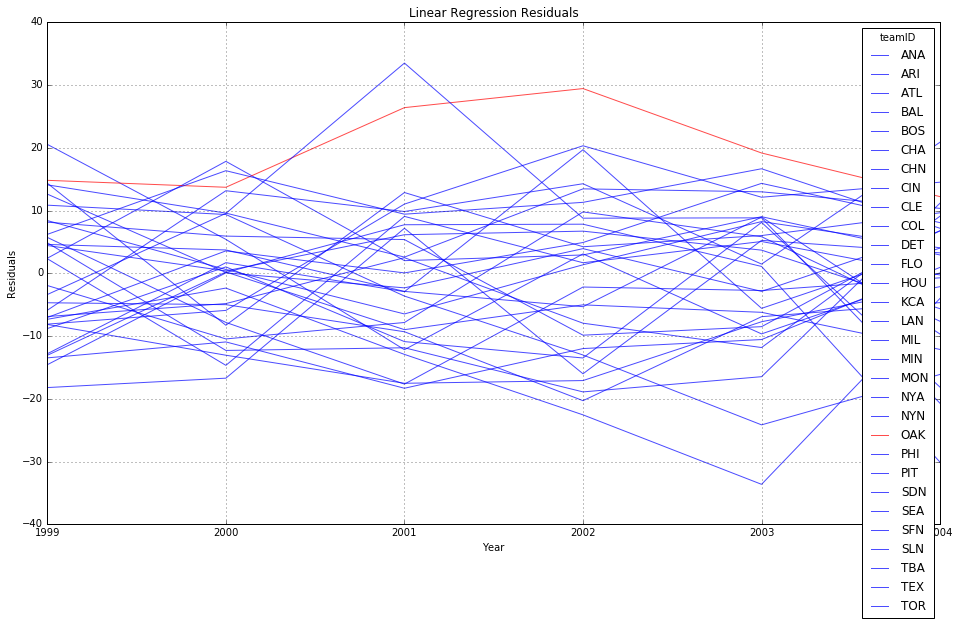

In [209]:
#your code here
residuals_df = pd.DataFrame()
for yr in years: 
    df = merged_df[merged_df['yearID'] == yr]
    x = df['salary'].values
    y = df['win'].values
    # use least squares estimation for linear regression
    # ei = yi -y'i
    A = np.array([x, np.ones(len(x))])
    w = np.linalg.lstsq(A.T, y)[0]
    yhat = (w[0] * x + w[1])
    residuals_df[yr] = y - yhat
  
residuals_df.index = df['teamID']
residuals_df = residuals_df.T
residuals_df.index = residuals_df.index.format()

residuals_df.plot(title='Linear Regression Residuals',
                  color=map(lambda x: 'red' if x=='OAK' else 'blue', df.teamID),
                  alpha=0.7,
                  figsize=(16, 9))

plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid()
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
From 1(d) and 1(e), we can see that the Oakland team was playing pretty good from 2000 to 2003. However, they did not have such good performance in the following year.